## Group 1

#### C00246500   Arnab Roy
#### C00233605 	Anjuman Ara Kali.
#### C00255172 	Alan O' Reilly
#### C00265987 	Elaine Koyce

# Insurance for Data Scientists CA

### In the following notebook we will be using different machine learning classification algorithms to prepare a Classification predictive model of our target variable. 

### The dataset is imported from Kaggle "https://www.kaggle.com/mu202199/safe-driver-prediction". 

### The dataset contains different parameters which the insurance company uses to charge the auto-insurance. This dataset also consists of a target feature, which predicts the probability that a driver will initiate an auto insurance claim in the following year. The target feature is already label encoded as 0 - the driver will not initiate the auto insurance and 1 - being the driver will initiate the auto insurance.

## Objective :-


### Application to help insurance companies make better decisions before making the auto-insurance contract based on various parameters. The objective is to test various classification algorithms and employing the best model for this application to get accurate predictions as to whether insurance can be given or not.

In [1]:
#importing required libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as make_subplots
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#fetching data into notebook

data = pd.read_csv('IT_3.csv')

In [3]:
#setting column size to 999

pd.set_option('display.max_columns', 999)

In [4]:
#head of data

data.head(5)

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State
0,1,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair,IL
1,2,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good,NJ
2,3,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good,CT
3,4,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good,CT
4,5,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good,WY


In [5]:
#information of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 17 columns):
ID                              30240 non-null int64
target                          30240 non-null int64
Gender                          30240 non-null object
EngineHP                        30240 non-null int64
credit_history                  30240 non-null int64
Years_Experience                30240 non-null int64
annual_claims                   30240 non-null int64
Marital_Status                  30240 non-null object
Vehical_type                    30240 non-null object
Miles_driven_annually           30232 non-null float64
size_of_family                  30240 non-null int64
Age_bucket                      30240 non-null object
EngineHP_bucket                 30240 non-null object
Years_Experience_bucket         30240 non-null object
Miles_driven_annually_bucket    30232 non-null object
credit_history_bucket           30240 non-null object
State                           3

In [6]:
#describing data

data.describe()

,ID,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
count,30240.000000,30240.00000,30240.000000,30240.000000,30240.000000,30240.000000,30232.000000,30240.000000
mean,15120.500000,0.70754,196.604266,685.769775,13.255721,1.138459,17422.938939,4.521296
std,8729.680407,0.45490,132.346961,102.454307,9.890246,1.082913,17483.782840,2.286531
min,1.000000,0.00000,80.000000,300.000000,1.000000,0.000000,5000.000000,1.000000
25%,7560.750000,0.00000,111.000000,668.000000,5.000000,0.000000,9668.500000,3.000000
50%,15120.500000,1.00000,141.000000,705.000000,10.000000,1.000000,12280.000000,5.000000
75%,22680.250000,1.00000,238.000000,753.000000,20.000000,2.000000,14697.250000,7.000000
max,30240.000000,1.00000,1005.000000,850.000000,40.000000,4.000000,99943.000000,8.000000


In [7]:
#checking null values

data.isnull().sum().sort_values(ascending=False)

Miles_driven_annually_bucket    8
Miles_driven_annually           8
State                           0
annual_claims                   0
target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
Vehical_type                    0
Marital_Status                  0
credit_history_bucket           0
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
ID                              0
dtype: int64

In [8]:
#Dropping null values

data.dropna(inplace = True)

In [9]:
#checking null values

data.isnull().sum().sort_values(ascending=False)

State                           0
Marital_Status                  0
target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
annual_claims                   0
Vehical_type                    0
credit_history_bucket           0
Miles_driven_annually           0
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
Miles_driven_annually_bucket    0
ID                              0
dtype: int64

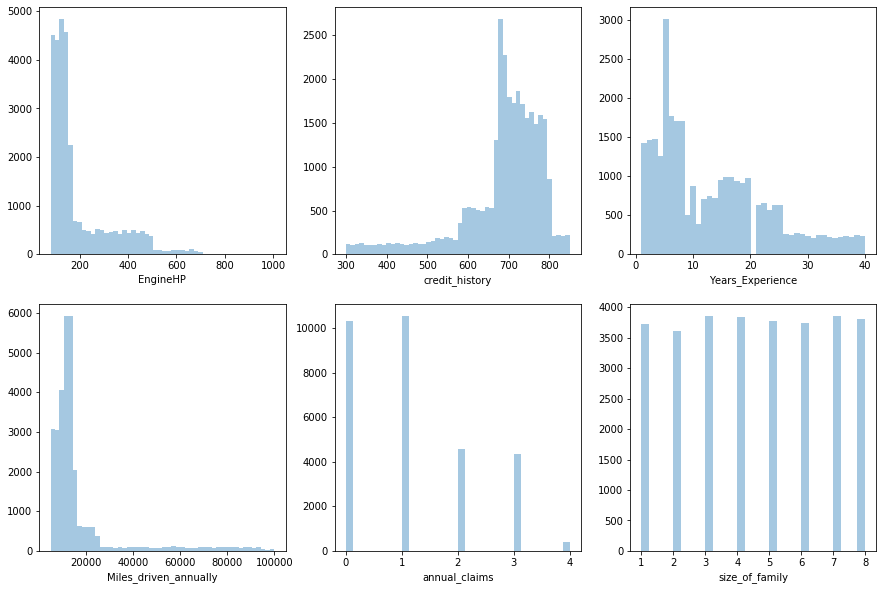

In [10]:
#data distribution for various columns

fig, axes = plt.subplots(nrows=2, ncols=3)

for i, ax in zip(('EngineHP','credit_history','Years_Experience','Miles_driven_annually','annual_claims','size_of_family'), axes.flat):
    sns.distplot(data[i], kde=False, ax=ax)

fig.set_size_inches(15,10)
plt.show()

In [11]:
#checking unqiue variables for the object type attributes

a = ['Gender','Marital_Status','Vehical_type','Age_bucket','EngineHP_bucket','Years_Experience_bucket','Miles_driven_annually_bucket','credit_history_bucket']

uniques = {col: data[col].unique() for col in a}

In [12]:
uniques

{'Gender': array(['F', 'M'], dtype=object),
 'Marital_Status': array(['Married', 'Single'], dtype=object),
 'Vehical_type': array(['Car', 'Van', 'Truck', 'Utility'], dtype=object),
 'Age_bucket': array(['<18', '28-34', '>40', '18-27', '35-40'], dtype=object),
 'EngineHP_bucket': array(['>350', '90-160', '<90', '161-350'], dtype=object),
 'Years_Experience_bucket': array(['<3', '15-30', "9-14'", '>30', "3-8'"], dtype=object),
 'Miles_driven_annually_bucket': array(['<15k', '15k-25k', '>25k'], dtype=object),
 'credit_history_bucket': array(['Fair', 'Good', 'Very Good', 'Exceptional', 'Very Poor'],
       dtype=object)}

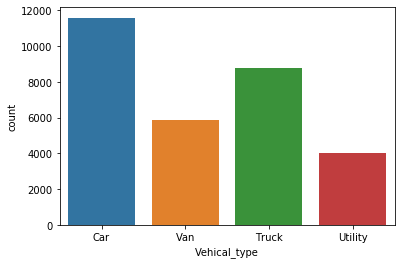

In [13]:
ax = sns.countplot(x="Vehical_type", data=data)

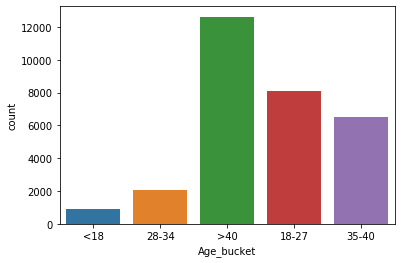

In [14]:
ax = sns.countplot(x="Age_bucket", data=data)

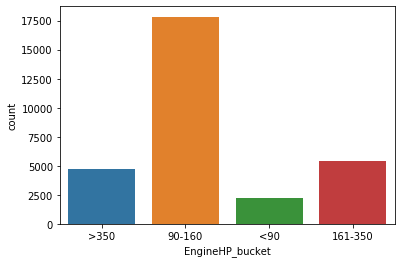

In [15]:
ax = sns.countplot(x="EngineHP_bucket", data=data)

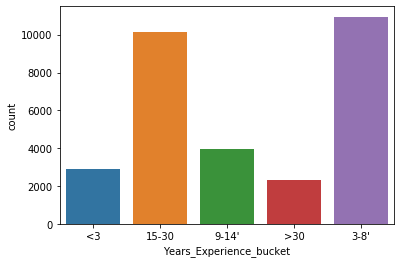

In [16]:
ax = sns.countplot(x="Years_Experience_bucket", data=data)

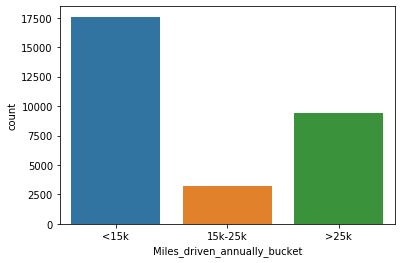

In [17]:
ax = sns.countplot(x="Miles_driven_annually_bucket", data=data)

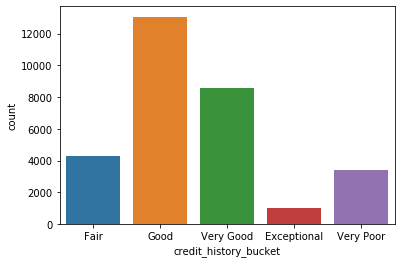

In [18]:
ax = sns.countplot(x="credit_history_bucket", data=data)

In [19]:
#Encoding Male as 0, Female as 1

data['Gender'] = data['Gender'].replace(to_replace = 'M', value=0)
data['Gender'] = data['Gender'].replace(to_replace = 'F', value=1)

In [20]:
# Encoding Single as 0, Married as 1

data['Marital_Status'] = data['Marital_Status'].replace(to_replace = 'Single', value=0)
data['Marital_Status'] = data['Marital_Status'].replace(to_replace = 'Married', value=1)

In [21]:
#Using one hot encoding for states

data['State'] = data['State'].astype('category').cat.codes

In [22]:
#data manipulation for object type columns

data['Miles_driven_annually_bucket'] = data['Miles_driven_annually_bucket'].replace(to_replace = '<15k', value=15)
data['Miles_driven_annually_bucket'] = data['Miles_driven_annually_bucket'].replace(to_replace = '15k-25k', value=20)
data['Miles_driven_annually_bucket'] = data['Miles_driven_annually_bucket'].replace(to_replace = '>25k', value=35)

In [23]:
#data manipulation for Years_Experience_bucket

data['Years_Experience_bucket'] = data['Years_Experience_bucket'].replace(to_replace = '<3', value=3)
data['Years_Experience_bucket'] = data['Years_Experience_bucket'].replace(to_replace = '15-30', value=22)
data['Years_Experience_bucket'] = data['Years_Experience_bucket'].replace(to_replace = "9-14'", value=12)
data['Years_Experience_bucket'] = data['Years_Experience_bucket'].replace(to_replace = '>30', value=35)
data['Years_Experience_bucket'] = data['Years_Experience_bucket'].replace(to_replace = "3-8'", value=6)

In [24]:
# Getting unique values for credit_history_bucket

data['credit_history_bucket'] = data['credit_history_bucket'].replace(to_replace = 'Exceptional', value=0)
data['credit_history_bucket'] = data['credit_history_bucket'].replace(to_replace = 'Very Poor', value=1)
data['credit_history_bucket'] = data['credit_history_bucket'].replace(to_replace = 'Fair', value=2)
data['credit_history_bucket'] = data['credit_history_bucket'].replace(to_replace = 'Good', value=3)
data['credit_history_bucket'] = data['credit_history_bucket'].replace(to_replace = 'Very Good', value=4)

In [25]:
#data manipulation for EngineHP_bucket

data['EngineHP_bucket'] = data['EngineHP_bucket'].replace(to_replace = '>350', value=400)
data['EngineHP_bucket'] = data['EngineHP_bucket'].replace(to_replace = '90-160', value=125)
data['EngineHP_bucket'] = data['EngineHP_bucket'].replace(to_replace = '<90', value=90)
data['EngineHP_bucket'] = data['EngineHP_bucket'].replace(to_replace = '161-350', value=250)

In [26]:
#data manipulation for Age_bucket

data['Age_bucket'] = data['Age_bucket'].replace(to_replace = '<18', value=18)
data['Age_bucket'] = data['Age_bucket'].replace(to_replace = '28-34', value=32)
data['Age_bucket'] = data['Age_bucket'].replace(to_replace = '>40', value=50)
data['Age_bucket'] = data['Age_bucket'].replace(to_replace = '18-27', value=23)
data['Age_bucket'] = data['Age_bucket'].replace(to_replace = '35-40', value=38)

In [27]:
#Creating 4 new columns using pandas dummy feature for Vehical type 

data = pd.get_dummies(data, prefix=['Vehical_type'], columns=['Vehical_type'], prefix_sep='_')

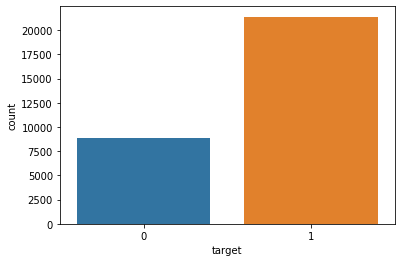

In [28]:
#countplot of target variable

sns.countplot(data['target'])

In [29]:
data.head(5)

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State,Vehical_type_Car,Vehical_type_Truck,Vehical_type_Utility,Vehical_type_Van
0,1,1,1,522,656,1,0,1,14749.0,5,18,400,3,15,2,13,1,0,0,0
1,2,1,1,691,704,16,0,1,15389.0,6,32,400,22,20,3,30,1,0,0,0
2,3,1,0,133,691,15,0,1,9956.0,3,50,125,22,15,3,6,0,0,0,1
3,4,1,0,146,720,9,0,1,77323.0,3,23,125,12,35,3,6,0,0,0,1
4,5,1,0,128,771,33,1,1,14183.0,4,50,125,35,15,4,49,0,0,0,1


In [30]:
#dropping column which isnt required

data = data.drop('ID', axis=1)

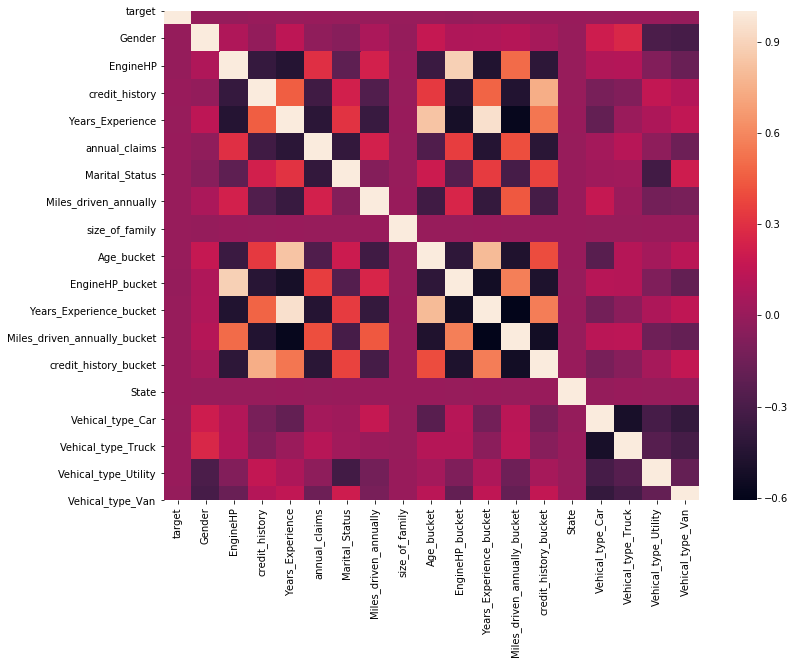

In [31]:
#heatmap showing the correlation of different attributes

corrmat = data.corr(method="spearman")
f, ax = plt.subplots(figsize=(12, 9))
corrmat
sns.heatmap(corrmat, xticklabels=True, yticklabels=True);

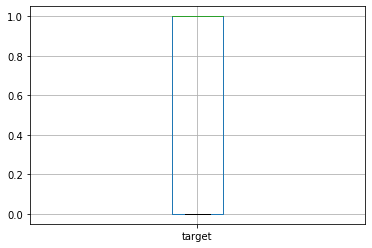

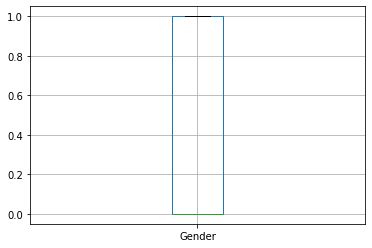

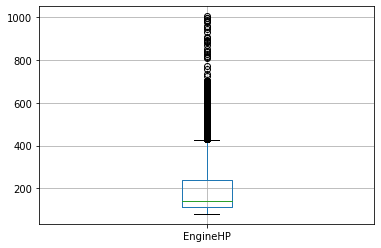

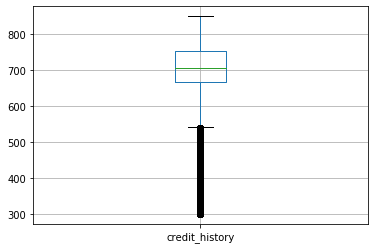

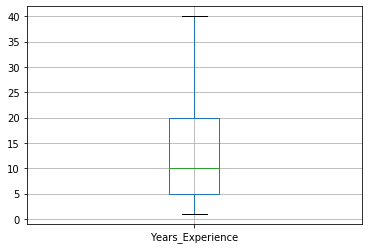

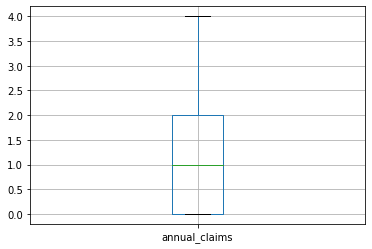

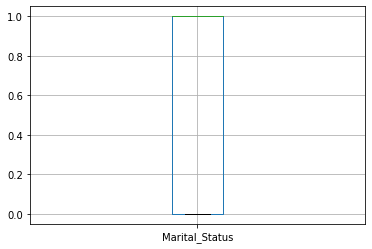

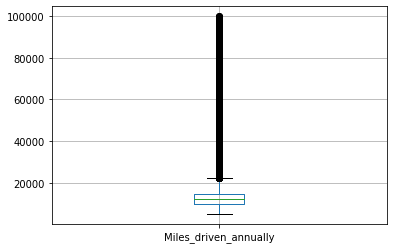

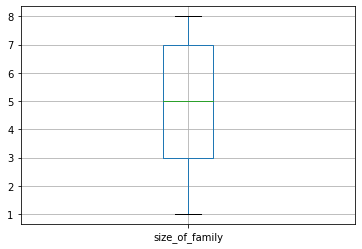

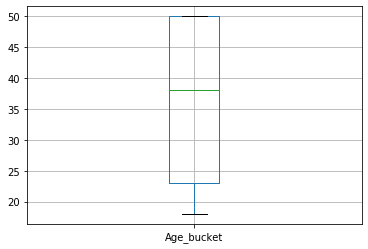

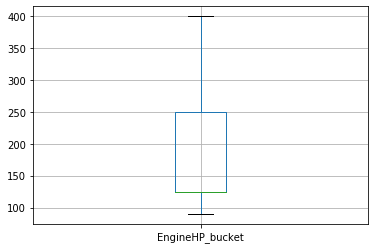

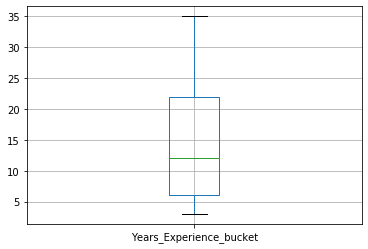

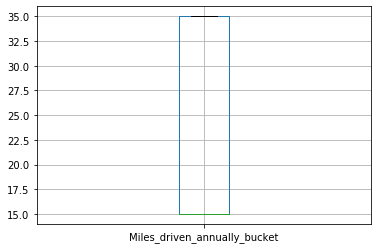

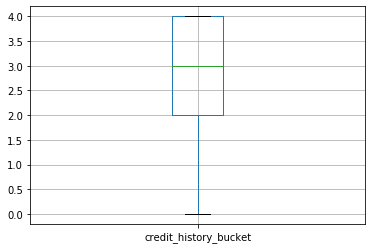

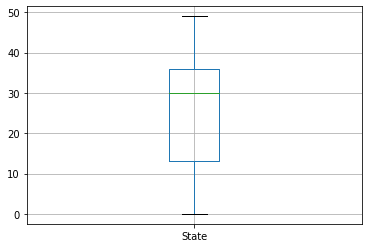

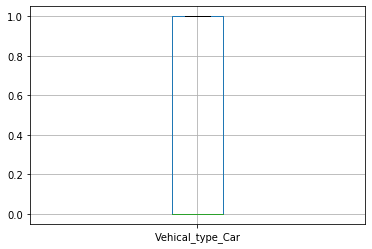

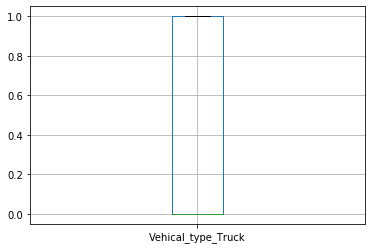

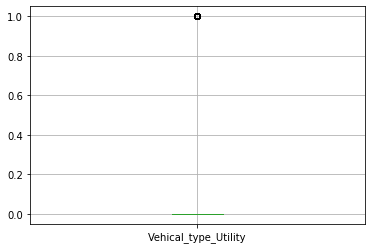

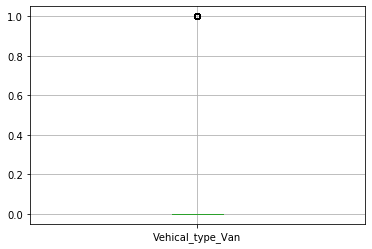

In [32]:
#checking for outliers

for column in data.columns:
    #print(column)
    plt.figure()
    data.boxplot([column])

In [33]:
#creating test and train data

y = data['target']
x = data.drop('target', axis=1)

print('Target dimentions: ',y.shape)
print('Independent data dimentions: ',x.shape)

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=101)

print('x_train dimentions: ',x_train.shape)
print('y_train  dimentions: ',y_train.shape)
print('x_test dimentions: ',x_test.shape)
print('y_test  dimentions: ',y_test.shape)

# As all dimentions are correct, we can move towards model creation, training and testing

Target dimentions:  (30232,)
Independent data dimentions:  (30232, 18)
x_train dimentions:  (21162, 18)
y_train  dimentions:  (21162,)
x_test dimentions:  (9070, 18)
y_test  dimentions:  (9070,)


In [34]:
#creating the model

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import itertools
from xgboost import plot_importance

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]

In [35]:
#Function to plot Confusion Matrix (to be used later).

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

KNeighborsClassifier
****Results****
Accuracy: 61.8082%
              precision    recall  f1-score   support

           0       0.30      0.20      0.24      2744
           1       0.70      0.80      0.74      6326

    accuracy                           0.62      9070
   macro avg       0.50      0.50      0.49      9070
weighted avg       0.58      0.62      0.59      9070

[[ 549 2195]
 [1269 5057]]
Confusion matrix, without normalization


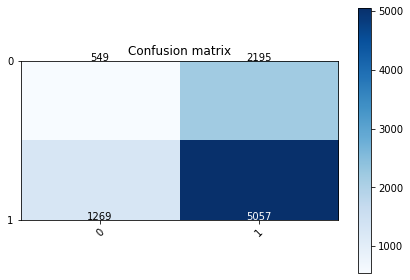

DecisionTreeClassifier
****Results****
Accuracy: 57.4090%
              precision    recall  f1-score   support

           0       0.30      0.31      0.31      2744
           1       0.70      0.69      0.69      6326

    accuracy                           0.57      9070
   macro avg       0.50      0.50      0.50      9070
weighted avg       0.58      0.57      0.58      9070

[[ 854 1890]
 [1973 4353]]
Confusion matrix, without normalization


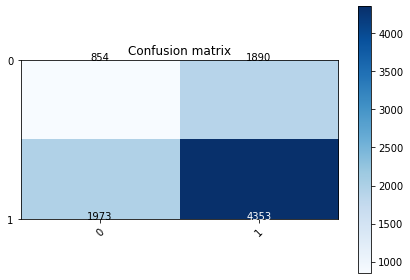

RandomForestClassifier
****Results****
Accuracy: 62.5469%
              precision    recall  f1-score   support

           0       0.29      0.16      0.21      2744
           1       0.69      0.83      0.75      6326

    accuracy                           0.63      9070
   macro avg       0.49      0.49      0.48      9070
weighted avg       0.57      0.63      0.59      9070

[[ 449 2295]
 [1102 5224]]
Confusion matrix, without normalization


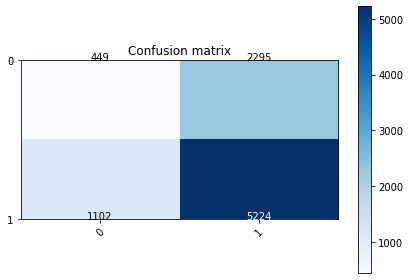

AdaBoostClassifier
****Results****
Accuracy: 69.7354%
              precision    recall  f1-score   support

           0       0.46      0.00      0.00      2744
           1       0.70      1.00      0.82      6326

    accuracy                           0.70      9070
   macro avg       0.58      0.50      0.41      9070
weighted avg       0.63      0.70      0.57      9070

[[   6 2738]
 [   7 6319]]
Confusion matrix, without normalization


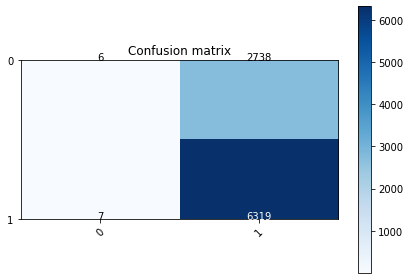

GradientBoostingClassifier
****Results****
Accuracy: 69.7244%
              precision    recall  f1-score   support

           0       0.45      0.00      0.01      2744
           1       0.70      1.00      0.82      6326

    accuracy                           0.70      9070
   macro avg       0.57      0.50      0.41      9070
weighted avg       0.62      0.70      0.57      9070

[[   9 2735]
 [  11 6315]]
Confusion matrix, without normalization


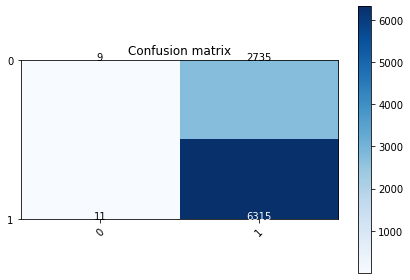

XGBClassifier
****Results****
Accuracy: 68.4013%
              precision    recall  f1-score   support

           0       0.32      0.04      0.07      2744
           1       0.70      0.96      0.81      6326

    accuracy                           0.68      9070
   macro avg       0.51      0.50      0.44      9070
weighted avg       0.58      0.68      0.59      9070

[[ 112 2632]
 [ 234 6092]]
Confusion matrix, without normalization


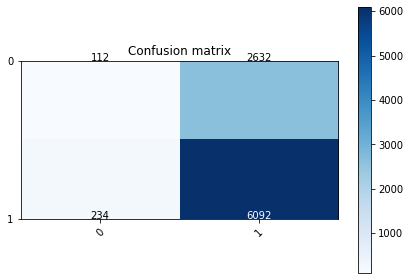

In [36]:
#training and testing

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    print(classification_report(y_test, train_predictions))
    print(confusion_matrix(y_test, train_predictions))
    
    cnf_matrix=confusion_matrix(y_test,train_predictions.round())
    plot_confusion_matrix(cnf_matrix,classes=[0,1])
    plt.show()

print("="*30)

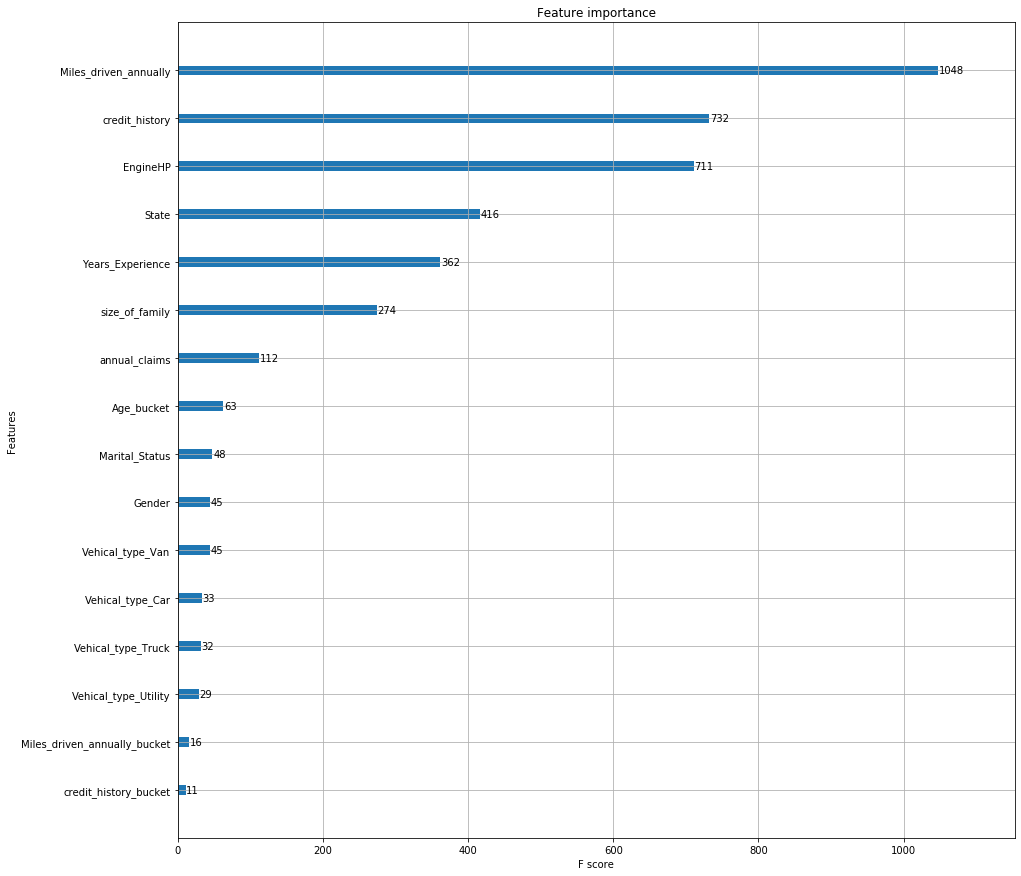

In [37]:
#feature importance in case of XGboost classifier

x = XGBClassifier()
x.fit(x_train, y_train)

plt.rcParams['figure.figsize'] = [15,15]
plot_importance(x)

## Summary

### 1. The data obtained was observed to be highly uncorrelated to the target feature as we can see from the heatmap, most of the attributes are negatively correlated. 

### 2. The best precision is 70% for detecting '1 - being the driver will initiate the auto insurance' and 45% for detecting '0- the driver will not initiate the auto insurance' for Gradient Boosting Classifier.

### 3. The model has 69 % accuracy, with Miles_driven_annualy being the most important feature incase of XGboost model. 